In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("covid_19_clean_complete.csv")

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,1/22/2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,1/22/2020,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,1/22/2020,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,1/22/2020,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,1/22/2020,0,0,0,0,Africa


In [5]:
df.shape

(49068, 10)

In [6]:
#Renaming the columns
df.rename(columns={"Date":"date",
                   "Province/State":"state",
                   "Country/Region":"country",
                   "Lat":"lat","Long":"long",
                   "Confirmed":"confirmed",
                   "Deaths":"deaths",
                   "Recovered":"recovered",
                   "WHO Region":"who",
                   "Active":"active"
                   },inplace = True)

In [7]:
df.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,who
0,NaN,Afghanistan,33.93911,67.709953,1/22/2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,1/22/2020,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,1/22/2020,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,1/22/2020,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,1/22/2020,0,0,0,0,Africa


In [8]:
df["date"].max()

'7/9/2020'

In [9]:
#Records from the last date
df[df["date"] == df["date"].max()]

,state,country,lat,long,date,confirmed,deaths,recovered,active,who
44109,NaN,Afghanistan,33.939110,67.709953,7/9/2020,33908,957,20847,12104,Eastern Mediterranean
44110,NaN,Albania,41.153300,20.168300,7/9/2020,3188,83,1832,1273,Europe
44111,NaN,Algeria,28.033900,1.659600,7/9/2020,17808,988,12637,4183,Africa
44112,NaN,Andorra,42.506300,1.521800,7/9/2020,855,52,802,1,Europe
44113,NaN,Angola,-11.202700,17.873900,7/9/2020,396,22,117,257,Africa
...,...,...,...,...,...,...,...,...,...,...
44365,NaN,Sao Tome and Principe,0.186400,6.613100,7/9/2020,726,14,283,429,Africa
44366,NaN,Yemen,15.552727,48.516388,7/9/2020,1356,361,619,376,Eastern Mediterranean
44367,NaN,Comoros,-11.645500,43.333300,7/9/2020,314,7,272,35,Africa
44368,NaN,Tajikistan,38.861000,71.276100,7/9/2020,6410,54,5067,1289,Europe


In [10]:
top = df[df["date"] == df["date"].max()]

In [11]:
world = top.groupby("country")["confirmed","active","deaths","recovered"].sum().reset_index()
world.head()

,country,confirmed,active,deaths,recovered
0,Afghanistan,33908,12104,957,20847
1,Albania,3188,1273,83,1832
2,Algeria,17808,4183,988,12637
3,Andorra,855,1,52,802
4,Angola,396,257,22,117


In [12]:
#Total confirmed cases in all countries together 
total_cases = df.groupby("date")["date","confirmed"].sum().reset_index()
total_cases.head()

,date,confirmed
0,1/22/2020,555
1,1/23/2020,654
2,1/24/2020,941
3,1/25/2020,1434
4,1/26/2020,2118


In [13]:
total_cases["date"] = pd.to_datetime(total_cases["date"])

Text(0, 0.5, 'Total cases')

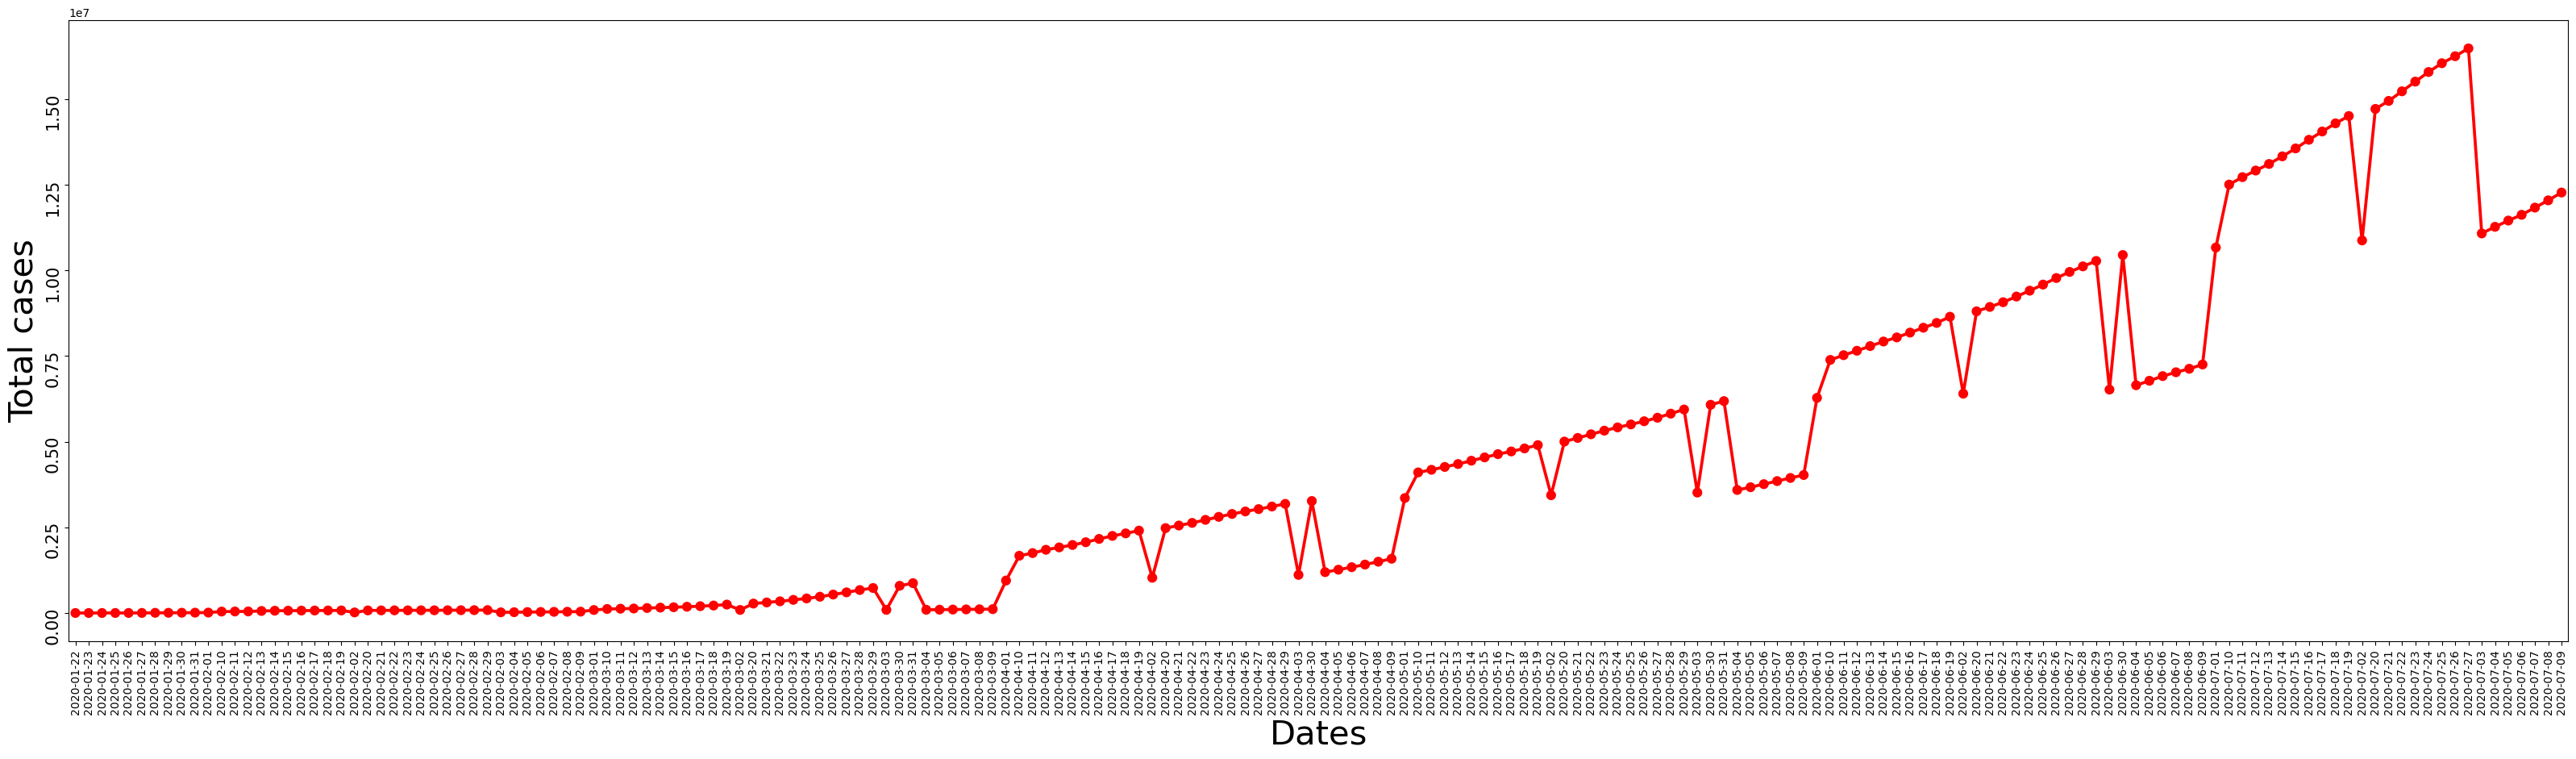

In [14]:
#Trend of covid

plt.figure(figsize = (40,10))
ax = sns.pointplot(x = total_cases.date.dt.date,y = total_cases.confirmed, color = "r")
ax.set(xlabel= "Dates", ylabel = "Total cases")

plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(rotation = 90, fontsize = 15)

plt.xlabel("Dates", fontsize = 30)
plt.ylabel("Total cases", fontsize = 30)

In [15]:
# top 20 countries with highest number of actives cases for the latest data 27th july 2020
top_actives = top.groupby(by="country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives

,country,active
0,US,2015545
1,Brazil,515148
2,India,276685
3,United Kingdom,243089
4,Russia,214920
5,South Africa,121558
6,Canada,99847
7,France,99079
8,Peru,97332
9,Pakistan,89449


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

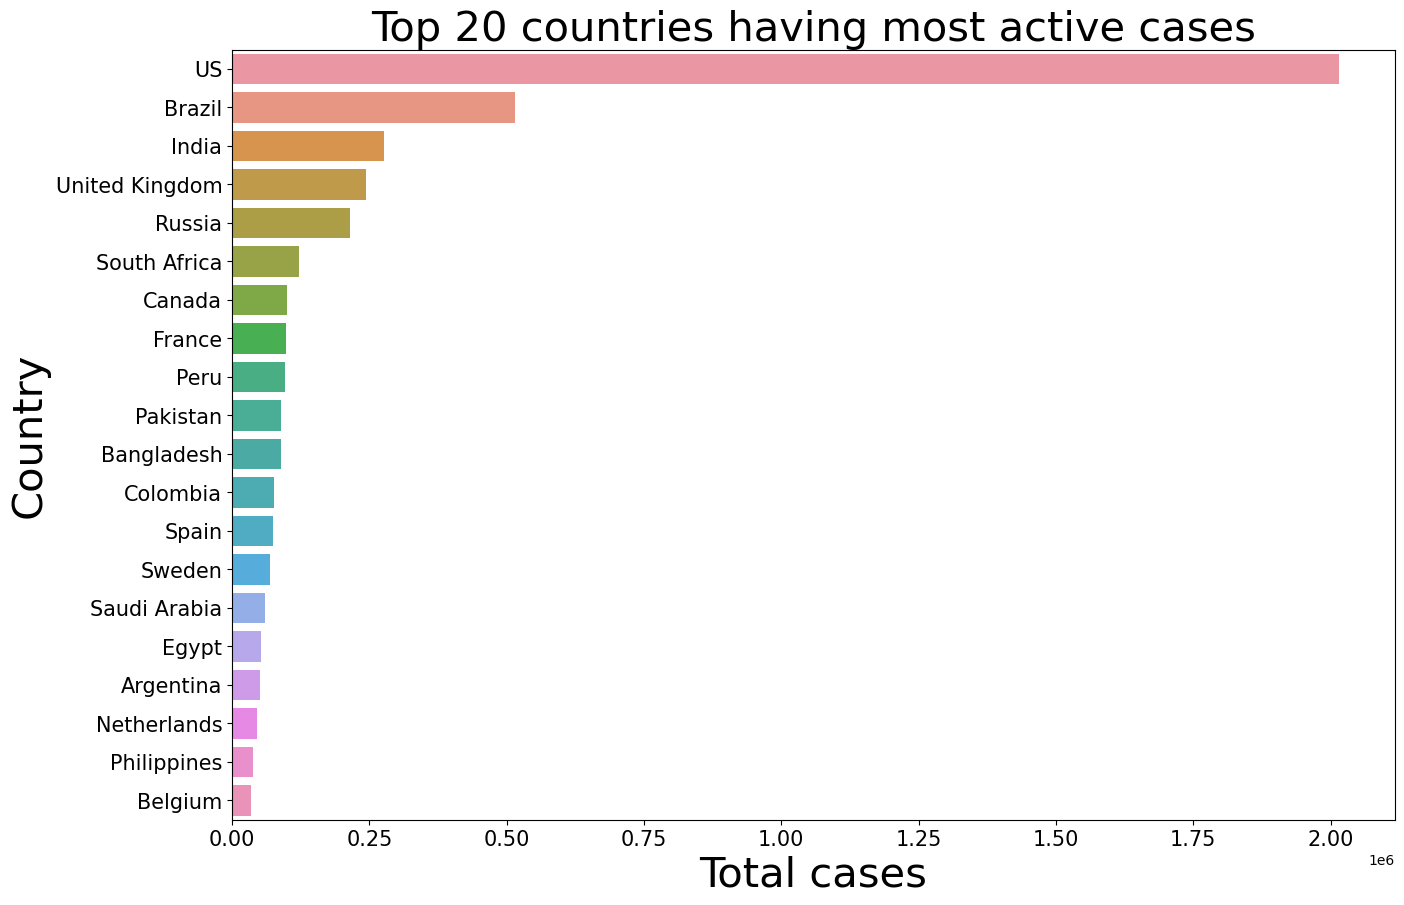

In [16]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most active cases",fontsize=30)

ax = sns.barplot(x=top_actives.active, y=top_actives.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [17]:
# top 20 countries with highest number of Death cases for the latest data 27th july 2020

top_deaths = top.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()
top_deaths

,country,deaths
0,US,133290
1,Brazil,69184
2,United Kingdom,44687
3,Italy,34926
4,Mexico,33526
5,France,29982
6,Spain,28401
7,India,21604
8,Iran,12305
9,Peru,11314


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

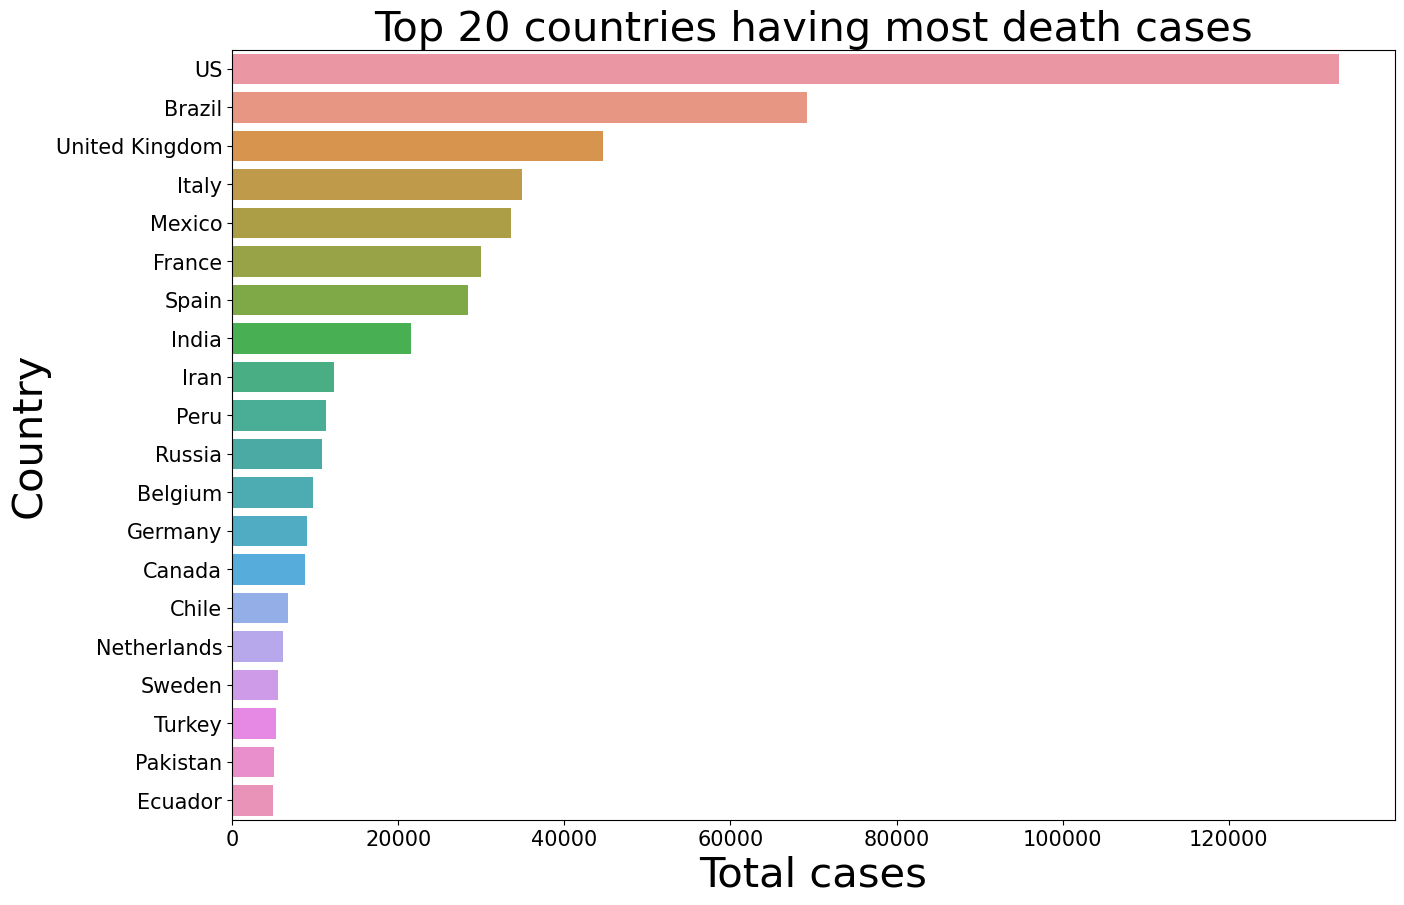

In [18]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most death cases",fontsize=30)
ax = sns.barplot(x=top_deaths.deaths, y=top_deaths.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [19]:
# Can also try with Recovered cases
# NUMBER OF PEOPLE RECOVERED
recovery = top.groupby(by="country")["recovered"].sum().sort_values(ascending=False).head(20).reset_index()
recovery

,country,recovered
0,Brazil,1171447
1,US,969111
2,India,495513
3,Russia,480494
4,Chile,274922
5,Mexico,219628
6,Iran,212176
7,Peru,207802
8,Italy,193978
9,Turkey,190390


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

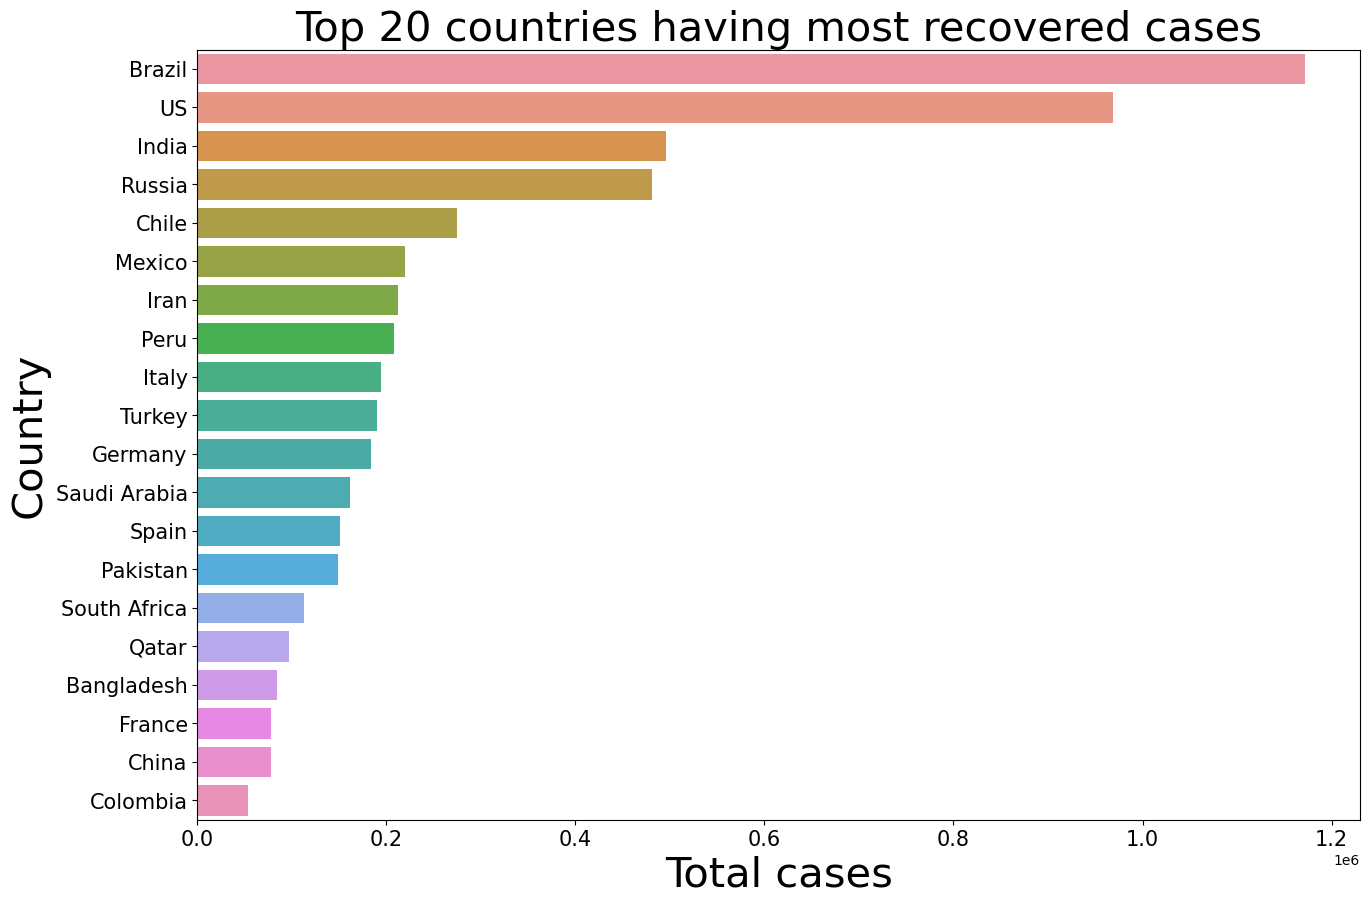

In [20]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most recovered cases",fontsize=30)
ax = sns.barplot(x=recovery.recovered, y=recovery.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [21]:
#US data
us = df[df.country == "US"]
us = us.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
us

,date,recovered,deaths,confirmed,active
0,1/22/2020,0,0,1,1
1,1/23/2020,0,0,1,1
2,1/24/2020,0,0,2,2
3,1/25/2020,0,0,2,2
4,1/26/2020,0,0,5,5
...,...,...,...,...,...
183,7/5/2020,906763,129960,2891124,1854401
184,7/6/2020,924148,130285,2936077,1881644
185,7/7/2020,936476,131480,2996098,1928142
186,7/8/2020,953462,132300,3054699,1968937


In [22]:
# #US data
# us = df[df.country == "US"]
# us = us.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
# us = us.iloc[33:].reset_index().drop("index",axis=1)
# us

In [23]:
#Brazil
brazil = df[df.country == "Brazil"]
brazil = brazil.groupby(by = "date")["recovered","deaths","confirmed","active"].sum().reset_index()
brazil.head(50)

,date,recovered,deaths,confirmed,active
0,1/22/2020,0,0,0,0
1,1/23/2020,0,0,0,0
2,1/24/2020,0,0,0,0
3,1/25/2020,0,0,0,0
4,1/26/2020,0,0,0,0
5,1/27/2020,0,0,0,0
6,1/28/2020,0,0,0,0
7,1/29/2020,0,0,0,0
8,1/30/2020,0,0,0,0
9,1/31/2020,0,0,0,0


In [24]:
#United kingdom
uk = df[df.country == "United Kingdom"]
uk = uk.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
uk

,date,recovered,deaths,confirmed,active
0,1/22/2020,0,0,0,0
1,1/23/2020,0,0,0,0
2,1/24/2020,0,0,0,0
3,1/25/2020,0,0,0,0
4,1/26/2020,0,0,0,0
...,...,...,...,...,...
183,7/5/2020,1375,44305,286931,241251
184,7/6/2020,1375,44321,287290,241594
185,7/7/2020,1375,44476,287874,242023
186,7/8/2020,1378,44602,288511,242531


In [25]:
#India

india = df[df.country == "India"]
india= india.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
india= india.iloc[9:].reset_index().drop("index",axis=1)
india

,date,recovered,deaths,confirmed,active
0,1/31/2020,0,0,1,1
1,2/1/2020,0,0,1,1
2,2/10/2020,0,0,3,3
3,2/11/2020,0,0,3,3
4,2/12/2020,0,0,3,3
...,...,...,...,...,...
174,7/5/2020,424433,19693,697413,253287
175,7/6/2020,439934,20159,719664,259571
176,7/7/2020,456831,20642,742417,264944
177,7/8/2020,476378,21129,767296,269789


In [26]:
df["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [27]:
#China

China = df[df.country == "China"]
China= india.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
China

,date,recovered,deaths,confirmed,active
0,1/31/2020,0,0,1,1
1,2/1/2020,0,0,1,1
2,2/10/2020,0,0,3,3
3,2/11/2020,0,0,3,3
4,2/12/2020,0,0,3,3
...,...,...,...,...,...
174,7/5/2020,424433,19693,697413,253287
175,7/6/2020,439934,20159,719664,259571
176,7/7/2020,456831,20642,742417,264944
177,7/8/2020,476378,21129,767296,269789


In [28]:
#Russia

Russia=df[df.country=='Russia']
Russia=Russia.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
Russia=Russia.iloc[10:].reset_index().drop('index',axis=1)
Russia

,date,recovered,deaths,confirmed,active
0,2/1/2020,0,0,2,2
1,2/10/2020,0,0,2,2
2,2/11/2020,0,0,2,2
3,2/12/2020,2,0,2,0
4,2/13/2020,2,0,2,0
...,...,...,...,...,...
173,7/5/2020,449995,10145,680283,220143
174,7/6/2020,453570,10280,686852,223002
175,7/7/2020,463103,10478,693215,219634
176,7/8/2020,471718,10650,699749,217381


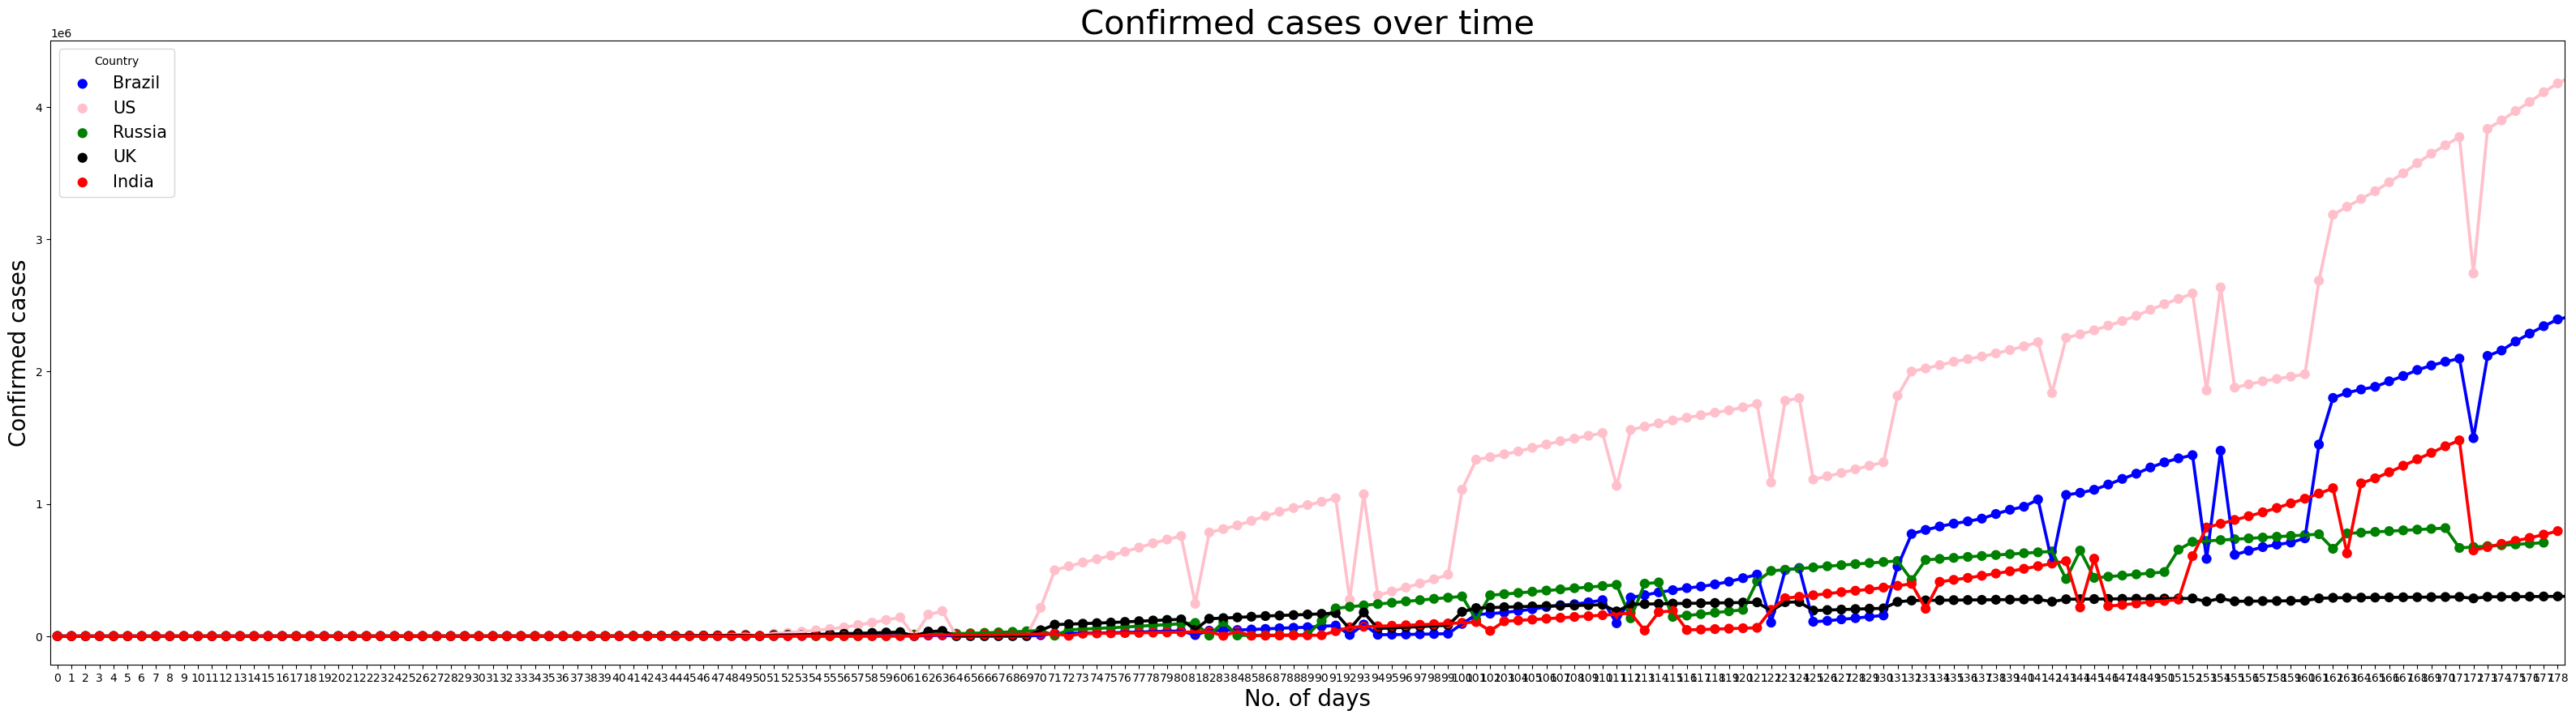

In [30]:
# Confirmed cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.pointplot(x=brazil.index, y=brazil.confirmed, color="Blue", label="Brazil")
sns.pointplot(x=us.index, y=us.confirmed, color="Pink", label="US")
sns.pointplot(x=Russia.index, y=Russia.confirmed, color="Green", label="Russia")
sns.pointplot(x=uk.index, y=uk.confirmed, color="Black", label="UK")
sns.pointplot(x=india.index, y=india.confirmed, color="Red", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Confirmed cases', fontsize=20)
plt.title('Confirmed cases over time', fontsize=30)
plt.legend(title="Country", fontsize=15)  # Adds a legend to differentiate lines
plt.show()

### US is having highest numbers of confirmed cases, as the number of increased cases is higher in US

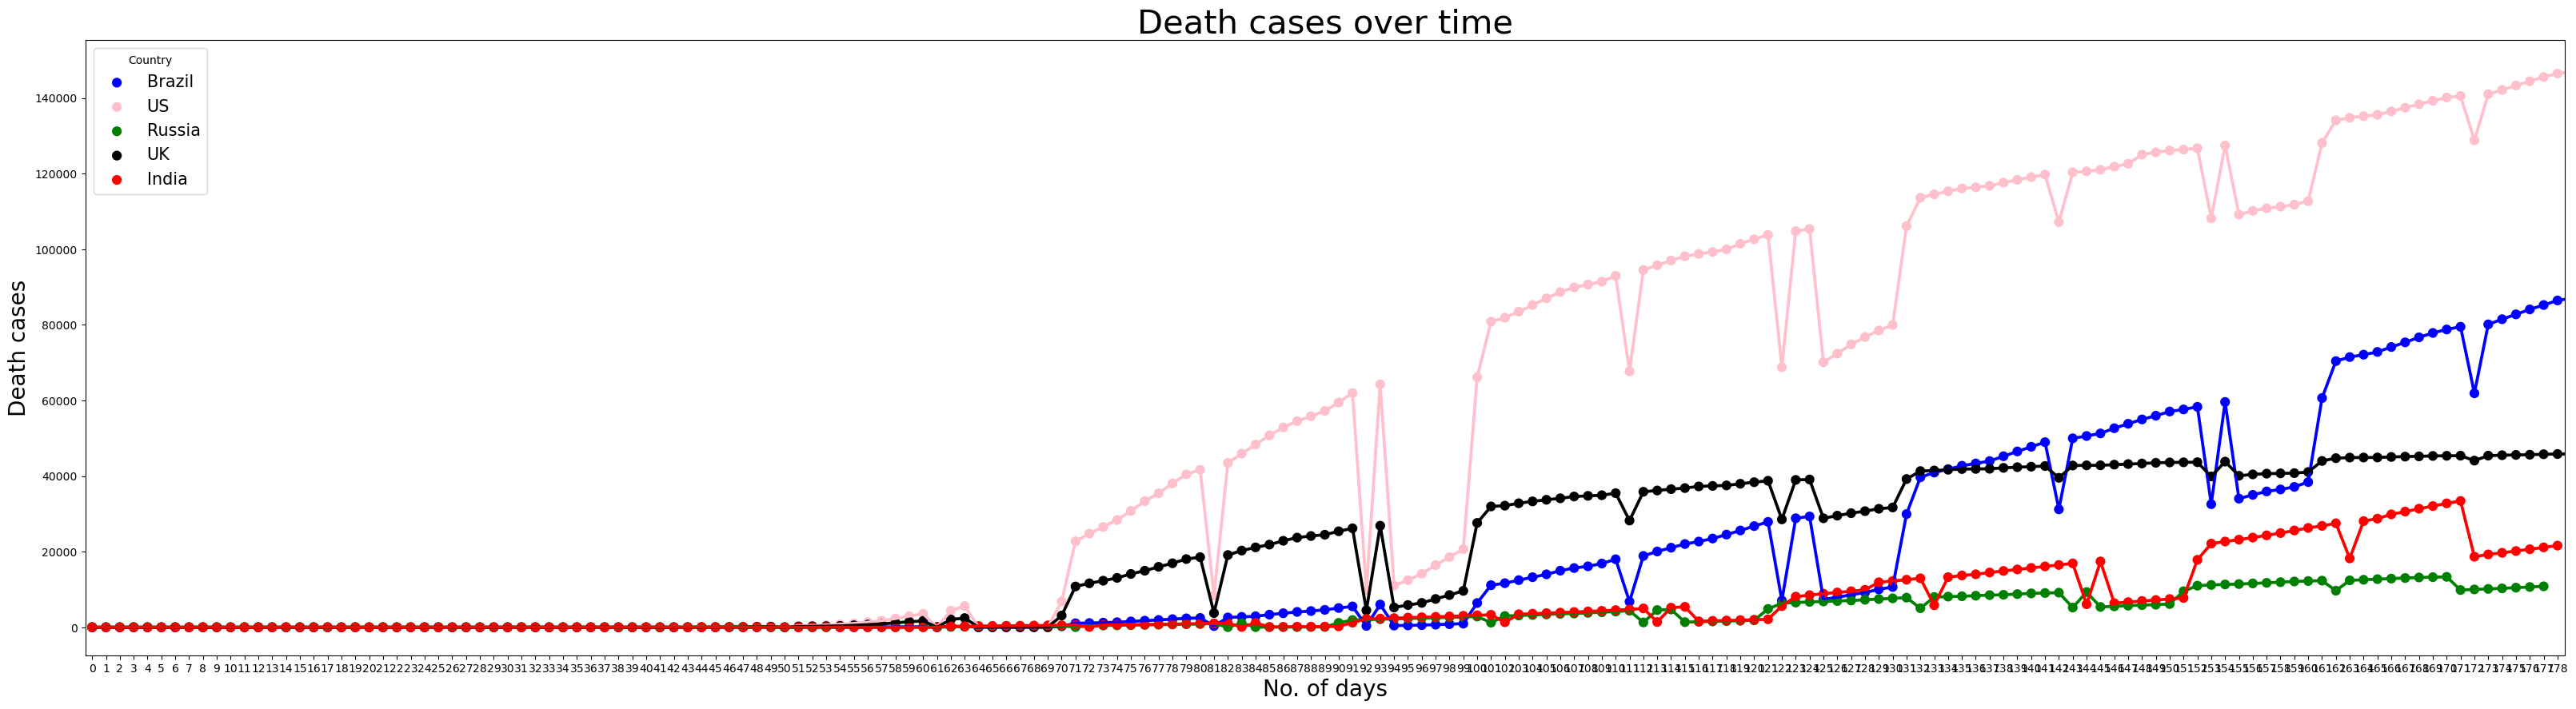

In [32]:
# Death cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.pointplot(x=brazil.index, y=brazil.deaths, color="Blue", label="Brazil")
sns.pointplot(x=us.index, y=us.deaths, color="Pink", label="US")
sns.pointplot(x=Russia.index, y=Russia.deaths, color="Green", label="Russia")
sns.pointplot(x=uk.index, y=uk.deaths, color="Black", label="UK")
sns.pointplot(x=india.index, y=india.deaths, color="Red", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Death cases', fontsize=20)
plt.title('Death cases over time', fontsize=30)
plt.legend(title="Country", fontsize=15)
plt.show()

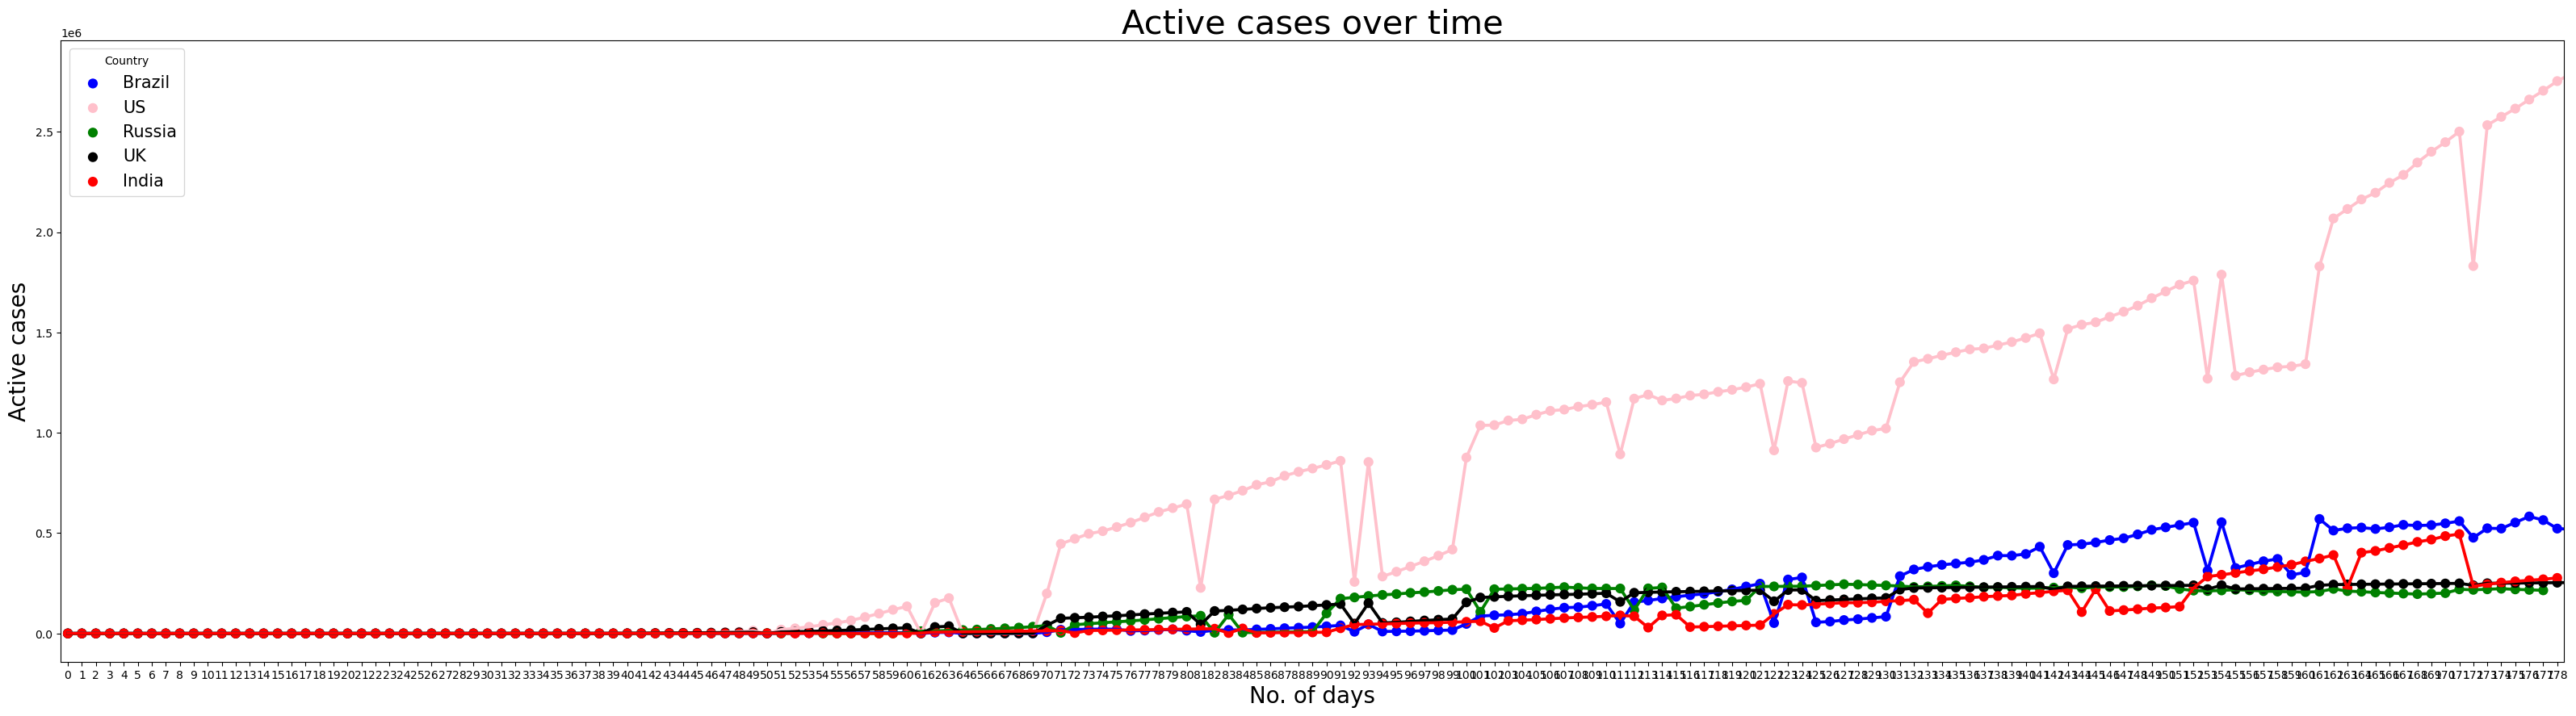

In [33]:
# Active cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.pointplot(x=brazil.index, y=brazil.active, color="Blue", label="Brazil")
sns.pointplot(x=us.index, y=us.active, color="Pink", label="US")
sns.pointplot(x=Russia.index, y=Russia.active, color="Green", label="Russia")
sns.pointplot(x=uk.index, y=uk.active, color="Black", label="UK")
sns.pointplot(x=india.index, y=india.active, color="Red", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Active cases', fontsize=20)
plt.title('Active cases over time', fontsize=30)
plt.legend(title="Country", fontsize=15)
plt.show()

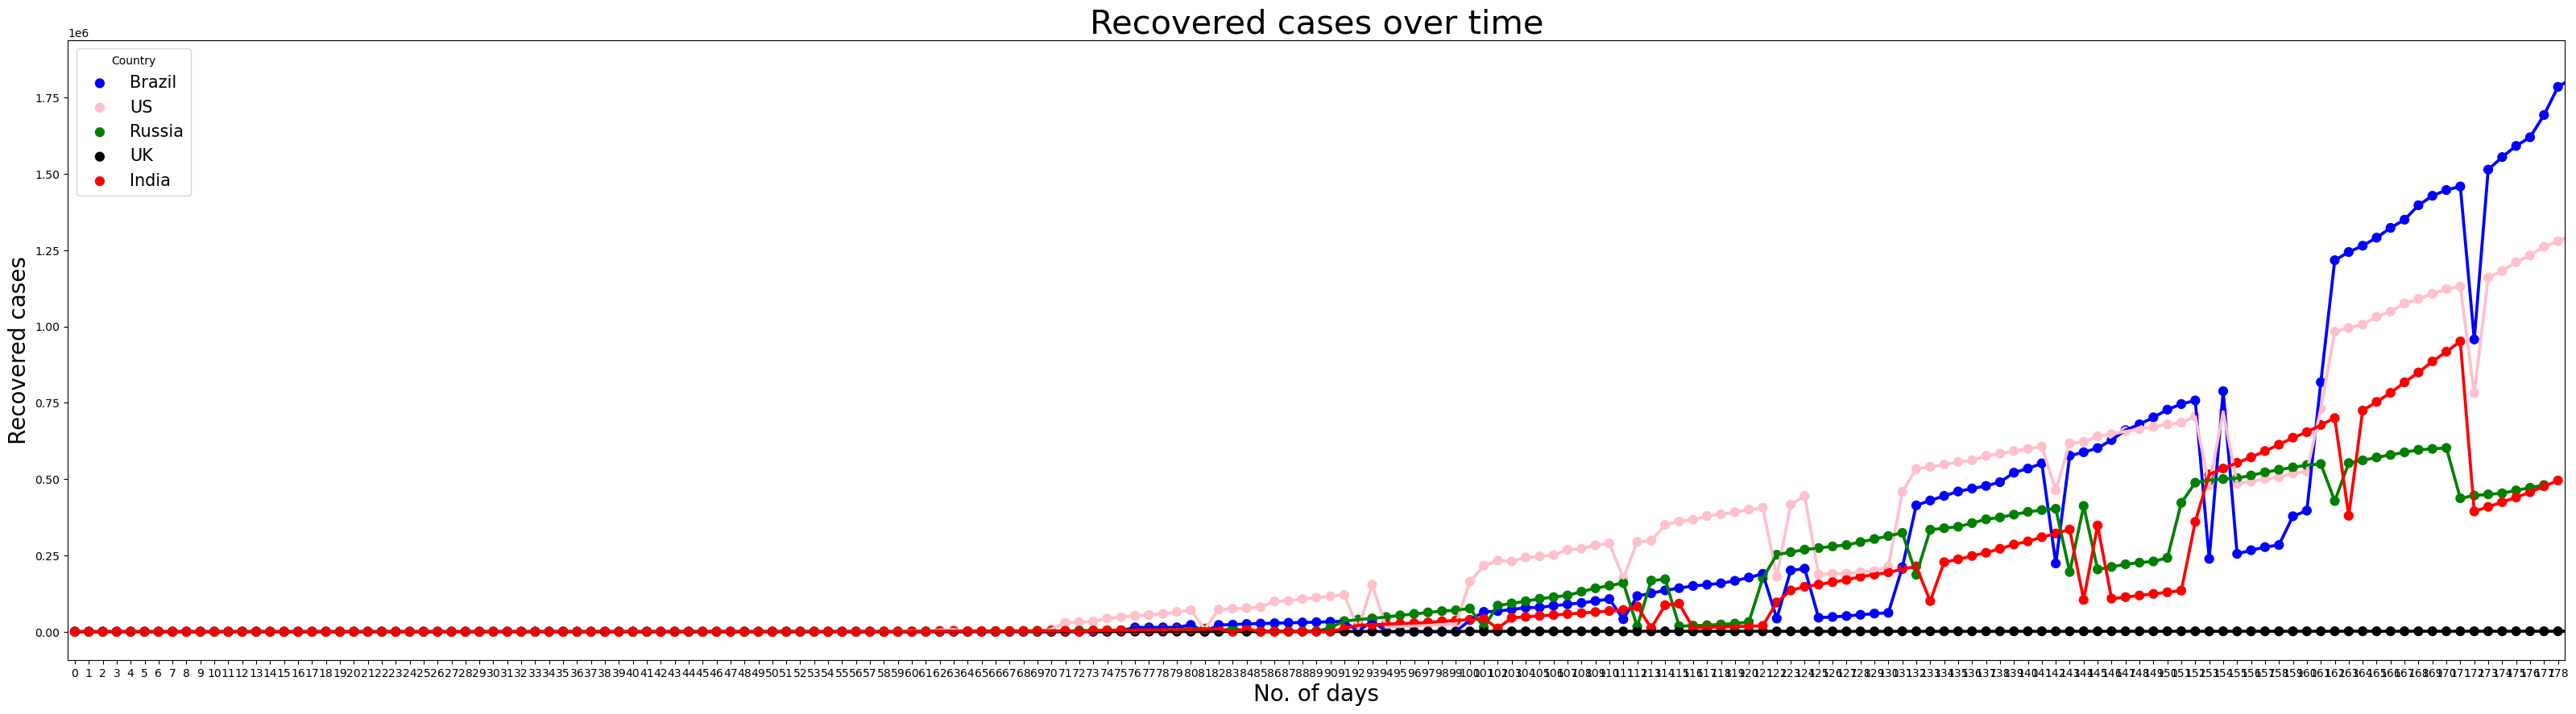

In [34]:
# Recovered cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.pointplot(x=brazil.index, y=brazil.recovered, color="Blue", label="Brazil")
sns.pointplot(x=us.index, y=us.recovered, color="Pink", label="US")
sns.pointplot(x=Russia.index, y=Russia.recovered, color="Green", label="Russia")
sns.pointplot(x=uk.index, y=uk.recovered, color="Black", label="UK")
sns.pointplot(x=india.index, y=india.recovered, color="Red", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Recovered cases', fontsize=20)
plt.title('Recovered cases over time', fontsize=30)
plt.legend(title="Country", fontsize=15)
plt.show()

In [35]:
pip install prophet


     ---------------------------------------- 13.3/13.3 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 94.5/94.5 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 5.9 MB/s eta 0:00:00


In [36]:
from prophet import Prophet

In [37]:
data=pd.read_csv("covid_19_clean_complete.csv",parse_dates=["Date"])
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [38]:
#To check how many total active cases are there

data["Active"].sum()

396715350

In [39]:
data['Confirmed'].sum()

828508482

In [40]:
confirmed = data.groupby("Date").sum()["Confirmed"].reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [41]:
confirmed.sum()

Confirmed    828508482
dtype: int64

In [42]:
deaths = data.groupby("Date").sum()["Deaths"].reset_index()
deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [43]:
recovered = data.groupby("Date").sum()["Recovered"].reset_index()
recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [44]:
#For buildign a forecasting model using fbprophet library
#there should be only 2 columns passed
#the column names should always be ---> 'ds','y'

confirmed.columns = ["ds", "y"]  #ds ---> date stamp, y ----> target
confirmed["ds"] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [45]:
deaths.columns=['ds','y']
deaths['ds']=pd.to_datetime(deaths['ds'])
deaths.tail()

,ds,y
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621
187,2020-07-27,654036


In [46]:
recovered.columns=['ds','y']
recovered['ds']=pd.to_datetime(recovered['ds'])
recovered.tail()

,ds,y
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464
187,2020-07-27,9468097


### Making forecasting of confirmed cases

In [47]:
#Eg: import sklear-----
# ld = LinearRegression()

m = Prophet()
m.fit(confirmed)

18:03:21 - cmdstanpy - INFO - Chain [1] start processing
18:03:23 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
future = m.make_future_dataframe(periods = 30) #this will forecast the data for next 30 days

In [49]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25


In [50]:
future.tail(10)

,ds
208,2020-08-17
209,2020-08-18
210,2020-08-19
211,2020-08-20
212,2020-08-21
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25
217,2020-08-26


In [51]:
forecast = m.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.146049e+07,2.107909e+07,2.185326e+07
214,2020-08-23,2.165828e+07,2.126758e+07,2.205550e+07
215,2020-08-24,2.185316e+07,2.144667e+07,2.226441e+07
216,2020-08-25,2.204276e+07,2.161621e+07,2.247561e+07
217,2020-08-26,2.225280e+07,2.180766e+07,2.271302e+07


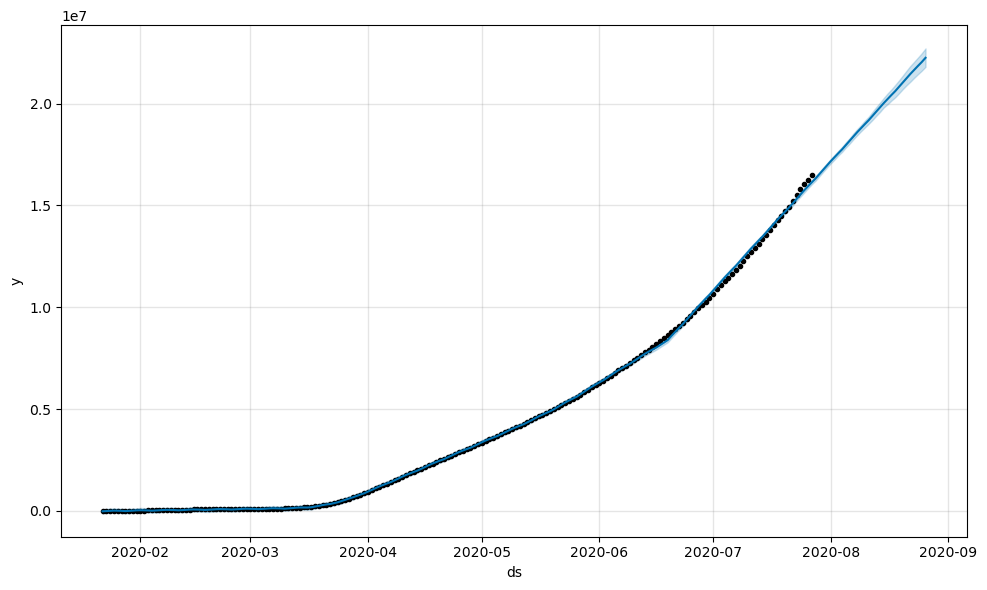

In [53]:
confirmed_forecasting_plot=m.plot(forecast)

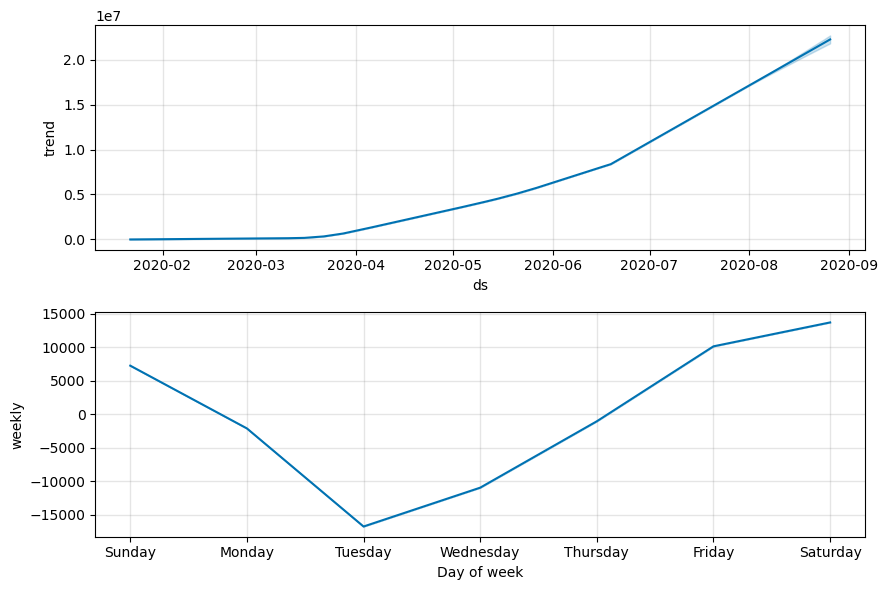

In [54]:
confirmed_forecasting_plot1=m.plot_components(forecast)